# Spotify Data pipeline

<img src="pipeline.png" alt="Types of data" width="800" height="650">

- The Spotify ETL pipeline is a comprehensive workflow process designed to extract, transform, and load data from Spotify's data sources (API) into a target destination for further analysis and storage. 
- The pipeline actively fetches data from Spotify, including user activity, song metadata, playlists, and other relevant information. 
- It then applies a series of transformations to clean, enrich, and aggregate the data, ensuring its quality and usability.
- Throughout the pipeline, active monitoring and management services, such as Amazon CloudWatch, are employed to track the performance, logs, and metrics of the pipeline. This ensures that the process runs smoothly and efficiently.
- Once the data is transformed, it is actively loaded into a target destination, such as a database, data warehouse, or data lake. This enables seamless access and analysis of the data by downstream applications and analytics tools.
- By leveraging the Spotify ETL pipeline, you can actively extract valuable insights, perform in-depth analysis, and make data-driven decisions based on the diverse and rich data available from the Spotify platform.

### Creation of Spotfiy API

-  Go to https://developer.spotify.com/ and login it (if you are not registered at the Spotfiy then create a account using your email and password).

-  After login, go to the dashboard and click "Create app" and follow the onscreen process and then create your secret ID for the etl pipeline (in my case, I created `spotfiy_etl_pipeline`) that will be used later in loading the data from the spotify to AWS S3 bucket.
  
 <img src="Spotify-dashboard.png" alt="Types of data" width="800" height="400">

- FInd the Client Id and the Client Secret from the created App.

- For more details, you can look at: https://developer.spotify.com/documentation/web-api

In [5]:
# To extract the data from the spotify API, there is a python library "spotfiy". We need to install it if already not installed on the local system.

%pip install spotipy

  Using cached spotipy-2.23.0-py3-none-any.whl (29 kB)
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/0b/34/a01250ac1fc9bf9161e07956d2d580413106ce02d5591470130a25c599e3/redis-5.0.1-py3-none-any.whl.metadata
  Using cached redis-5.0.1-py3-none-any.whl.metadata (8.9 kB)
Using cached redis-5.0.1-py3-none-any.whl (250 kB)
Note: you may need to restart the kernel to use updated packages.


In [65]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [17]:
# Retrieve the value of the SPOTIPY_CLIENT_SECRET environment variable
client_secret = 'your-client_secret'
client_id = 'your_client_id'

In [18]:
# We need to provide the spotify credentials which provide permission to extract the data from the spotify
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)

To make my Client Id and client secret, secure I saved them locally using:
```
export SPOTIPY_CLIENT_ID='your-spotify-client-id'
export SPOTIPY_CLIENT_SECRET='your-spotify-client-secret'
export SPOTIPY_REDIRECT_URI='your-app-redirect-url'
```

In [19]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [20]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF"
# We are maily interested in playlist id: 37i9dQZEVXbMDoHDwVN2tF

In [21]:
playlist_URI = playlist_link.split("/")[-1]

In [89]:
playlist_URI

'37i9dQZEVXbMDoHDwVN2tF'

In [24]:
data = sp.playlist_tracks(playlist_URI)

here data is in JSON format. An example of JSON file is as follows:

```
{
  "employee": {
    "firstName": "John",
    "lastName": "Doe",
    "age": 30,
    "email": "john.doe@example.com"
  },
  "address": {
    "street": "123 Main St",
    "city": "Anytown",
    "state": "CA",
    "postalCode": "12345"
  },
  "skills": ["JavaScript", "Python", "JSON"],
  "isEmployed": true
}

```

- The JSON structure is enclosed within curly braces {} to define an object.
- Each key is a string enclosed in double quotes, followed by a colon :, and then a value.
- Keys and values are separated by a colon.
- Key-value pairs are separated by commas.
- Values can be of various types, including strings, numbers, booleans, arrays, or nested objects.

In [54]:
data

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbMDoHDwVN2tF/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-10-10T08:50:30Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
       'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
       'id': '6HaGTQPmzraVmaVxvz6EUc',
       'name': 'Jung Kook',
       'type': 'artist',
       'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
       'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
       'id': '3MdXrJWsbVzdn6fe5JYkSQ',
    

Inside `items`, tyhese are the main objects:
- added_at
- added_by
- is_local
- primary_color
- track
  - album

In details, they are desginged as follows:

```
{
  "added_at": "2023-10-10T08:50:30Z",
  "added_by": {
    "external_urls": {"spotify": "https://open.spotify.com/user/"},
    "href": "https://api.spotify.com/v1/users/",
    "id": "",
    "type": "user",
    "uri": "spotify:user:"
  },
  "is_local": false,
  "primary_color": null,
  "track": {
    "album": {
      "album_type": "single",
      "artists": [
        {
          "external_urls": {
            "spotify": "https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc"
          },
          "href": "https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc",
          "id": "6HaGTQPmzraVmaVxvz6EUc",
          "name": "Jung Kook",
          "type": "artist",
          "uri": "spotify:artist:6HaGTQPmzraVmaVxvz6EUc"
        },
        {
          "external_urls": {
            "spotify": "https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ"
          },
          "href": "https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ",
          "id": "3MdXrJWsbVzdn6fe5JYkSQ",
          "name": "Latto",
          "type": "artist",
          "uri": "spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ"
        }
      ],
      "available_markets": [ "AR", "AU", "AT", "BE", "BO", "BR", "BG", "CA", "CL", "CO", "CR", "CY", "CZ", "DK", "DO", "DE", "EC", "EE", "SV", "FI", "FR", "GR", "GT", "HN", HK", "HU", "IS", "IE", "IT", "LV", "LT", "LU", "MY", "MT", "MX", "NL",  "NZ", "NI", "NO", "PA", "PY", "PE", "PH", "PL", "PT", "SG", "SK", "ES", "SE", "CH", "TW", "TR", "UY", "US", "GB", "AD", "LI", "MC", "ID", "JP", "TH", "VN", "RO", "IL", "ZA", "SA", "AE", "BH", "QA", "OM", "KW", "EG", "MA", "DZ", "TN", "LB", "JO", "PS", "IN", "BY", "KZ","MD", "UA", "AL", "BA", "HR", "ME", "MK", "RS", "SI", "KR", "BD", "PK", "LK", "GH", "KE", "NG", "TZ", "UG", "AG", "AM", "BS", "BB", "BZ", "BT", "BW", "BF", "CV", "CW", "DM", "FJ", "GM", "GE", "GD", "GW", "GY", "HT", "JM", "KI", "LS", "LR", "MW", "MV", "ML", "MH", "FM", "NA", "NR", "NE", "PW", "PG", "WS", "SM", "ST", "SN", "SC", "SL", "SB", "KN", "LC", "VC", "SR", "TL", "TO", "TT", "TV", "VU", "AZ", "BN", "BI", "KH", "CM", "TD", "KM", "GQ", "SZ", "GA", "GN", "KG", "LA", "MO", "MR", "MN", "NP", "RW", "TG", "UZ", "ZW", "BJ", "MG", "MU", "MZ", "AO", "CI", "DJ", "ZM", "CD", "CG", "IQ", "LY", "TJ", "VE", "ET", "XK"]
    }
  }
}

```

In [55]:
len(data['items'])

50

In [56]:
data['items']

[{'added_at': '2023-10-10T08:50:30Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
      'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
      'id': '6HaGTQPmzraVmaVxvz6EUc',
      'name': 'Jung Kook',
      'type': 'artist',
      'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
      'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
      'id': '3MdXrJWsbVzdn6fe5JYkSQ',
      'name': 'Latto',
      'type': 'artist',
      'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
    'available_markets': ['AR',
     'AU',
     '

In [50]:
# 0th item
data['items'][0]

{'added_at': '2023-10-10T08:50:30Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
     'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
     'id': '6HaGTQPmzraVmaVxvz6EUc',
     'name': 'Jung Kook',
     'type': 'artist',
     'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
     'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
     'id': '3MdXrJWsbVzdn6fe5JYkSQ',
     'name': 'Latto',
     'type': 'artist',
     'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',

In [31]:
data['items'][0]['track']['album']

{'album_type': 'single',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
   'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
   'id': '6HaGTQPmzraVmaVxvz6EUc',
   'name': 'Jung Kook',
   'type': 'artist',
   'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
   'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
   'id': '3MdXrJWsbVzdn6fe5JYkSQ',
   'name': 'Latto',
   'type': 'artist',
   'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}],
 'available_markets': ['AR',
  'AU',
  'AT',
  'BE',
  'BO',
  'BR',
  'BG',
  'CA',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DK',
  'DO',
  'DE',
  'EC',
  'EE',
  'SV',
  'FI',
  'FR',
  'GR',
  'GT',
  'HN',
  'HK',
  'HU',
  'IS',
  'IE',
  'IT',
  'LV',
  'LT',
  'LU',
  'MY',
  'MT',
  'MX',
  'NL',
  'NZ',
  'NI',
  'NO',
  'PA',
  'PY',
  'PE',
  'PH',
  'PL',
  'P

In [57]:
data['items'][0]['track']['album']['id']

'53985D8g3JcGBoULSOYYKX'

In [32]:
data['items'][0]['track']['album']['name']

'Seven (feat. Latto)'

In [39]:
data['items'][0]['track']['album']['id']

'53985D8g3JcGBoULSOYYKX'

In [35]:
data['items'][0]['track']['album']['release_date']

'2023-07-14'

In [36]:
data['items'][0]['track']['album']['total_tracks']

3

In [37]:
data['items'][0]['track']['album']['external_urls']

{'spotify': 'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'}

In [38]:
data['items'][0]['track']['album']['external_urls']['spotify']

'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'

In [58]:
album_list = []
for row in data['items']:
    album_id = row['track']['album']['id']
    album_name = row['track']['album']['name']
    album_release_date = row['track']['album']['release_date']
    album_total_tracks=row['track']['album']['total_tracks']
    album_url = row['track']['album']['external_urls']['spotify']
    album_element = {'album_id' : album_id, 
                     'album_name' : album_name, 
                     'release_date': album_release_date, 
                     'total_tracks': album_total_tracks, 
                     'url': album_url
                     }
    album_list.append(album_element)

In [59]:
print(album_id)

52PtAAvfi8ZGTRK5c700y4


In [60]:
album_list

[{'album_id': '53985D8g3JcGBoULSOYYKX',
  'album_name': 'Seven (feat. Latto)',
  'release_date': '2023-07-14',
  'total_tracks': 3,
  'url': 'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'},
 {'album_id': '1bBez9PNvkJPW08bU7NYta',
  'album_name': 'Scarlet',
  'release_date': '2023-09-20',
  'total_tracks': 15,
  'url': 'https://open.spotify.com/album/1bBez9PNvkJPW08bU7NYta'},
 {'album_id': '3UOV8XvCwMKaATRNXrYCjN',
  'album_name': 'greedy',
  'release_date': '2023-09-15',
  'total_tracks': 1,
  'url': 'https://open.spotify.com/album/3UOV8XvCwMKaATRNXrYCjN'},
 {'album_id': '0fJ0beklzFwoBv01U8792s',
  'album_name': '3D : The Remixes',
  'release_date': '2023-10-02',
  'total_tracks': 7,
  'url': 'https://open.spotify.com/album/0fJ0beklzFwoBv01U8792s'},
 {'album_id': '4czdORdCWP9umpbhFXK2fW',
  'album_name': 'For All The Dogs',
  'release_date': '2023-10-06',
  'total_tracks': 23,
  'url': 'https://open.spotify.com/album/4czdORdCWP9umpbhFXK2fW'},
 {'album_id': '66k6EGkPtYoN44anGIs

In [62]:
data['items'][0]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
  'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
  'id': '6HaGTQPmzraVmaVxvz6EUc',
  'name': 'Jung Kook',
  'type': 'artist',
  'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
  'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
  'id': '3MdXrJWsbVzdn6fe5JYkSQ',
  'name': 'Latto',
  'type': 'artist',
  'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}]

In [63]:
artist_list = []
for row in data['items']:
    for key, value in row.items():
        if key =='track':
            for artist in value['artists']:
                artist_dict = {'artist_id': artist['id'], 'artist_name' : artist['name'], 'external_url' : artist['href']}
                artist_list.append(artist_dict)
            print(value['artists'])

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'}, 'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc', 'id': '6HaGTQPmzraVmaVxvz6EUc', 'name': 'Jung Kook', 'type': 'artist', 'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'}, 'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ', 'id': '3MdXrJWsbVzdn6fe5JYkSQ', 'name': 'Latto', 'type': 'artist', 'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5cj0lLjcoR7YOSnhnX0Po5'}, 'href': 'https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5', 'id': '5cj0lLjcoR7YOSnhnX0Po5', 'name': 'Doja Cat', 'type': 'artist', 'uri': 'spotify:artist:5cj0lLjcoR7YOSnhnX0Po5'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/45dkTj5sMRSjrmBSBeiHym'}, 'href': 'https://api.spotify.com/v1/artists/45dkTj5sMRSjrmBSBeiHym', 'id': '45d

In [64]:
song_list = []
for row in data['items']:
    song_id = row['track']['id']
    song_name = row['track']['name']
    song_duration = row['track']['duration_ms']
    song_url = row['track']['external_urls']['spotify']
    song_popularity = row['track']['popularity']
    song_added = row['added_at']
    album_id = row['track']['album']['id']
    artist_id = row['track']['album']['artists'][0]['id']
    song_element = {'song_id' : song_id, 'song_name' : song_name, 'duration_ms' : song_duration, 'url' : song_url,
                    'popularity': song_popularity, 'song_added' : song_added, 'album_id': album_id, 'artist_id' : artist_id}
    song_list.append(song_element)

In [73]:
album_df = pd.DataFrame.from_dict(album_list)
artist_df = pd.DataFrame.from_dict(artist_list)
song_df = pd.DataFrame.from_dict(song_list)

In [76]:
album_df = album_df.drop_duplicates(subset=['album_id'])

In [80]:
artist_df = artist_df.drop_duplicates(subset=['artist_id'])

In [82]:
song_df = song_df.drop_duplicates(subset=['song_id'])

In [83]:
album_df.head()

,album_id,album_name,release_date,total_tracks,url
0,53985D8g3JcGBoULSOYYKX,Seven (feat. Latto),2023-07-14,3,https://open.spotify.com/album/53985D8g3JcGBoU...
1,1bBez9PNvkJPW08bU7NYta,Scarlet,2023-09-20,15,https://open.spotify.com/album/1bBez9PNvkJPW08...
2,3UOV8XvCwMKaATRNXrYCjN,greedy,2023-09-15,1,https://open.spotify.com/album/3UOV8XvCwMKaATR...
3,0fJ0beklzFwoBv01U8792s,3D : The Remixes,2023-10-02,7,https://open.spotify.com/album/0fJ0beklzFwoBv0...
4,4czdORdCWP9umpbhFXK2fW,For All The Dogs,2023-10-06,23,https://open.spotify.com/album/4czdORdCWP9umpb...


In [84]:
artist_df.head()

,artist_id,artist_name,external_url
0,6HaGTQPmzraVmaVxvz6EUc,Jung Kook,https://api.spotify.com/v1/artists/6HaGTQPmzra...
1,3MdXrJWsbVzdn6fe5JYkSQ,Latto,https://api.spotify.com/v1/artists/3MdXrJWsbVz...
2,5cj0lLjcoR7YOSnhnX0Po5,Doja Cat,https://api.spotify.com/v1/artists/5cj0lLjcoR7...
3,45dkTj5sMRSjrmBSBeiHym,Tate McRae,https://api.spotify.com/v1/artists/45dkTj5sMRS...
5,2LIk90788K0zvyj2JJVwkJ,Jack Harlow,https://api.spotify.com/v1/artists/2LIk90788K0...


In [85]:
song_df.head()

,song_id,song_name,duration_ms,url,popularity,song_added,album_id,artist_id
0,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),184400,https://open.spotify.com/track/7x9aauaA9cu6tyf...,97,2023-10-10T08:50:30Z,53985D8g3JcGBoULSOYYKX,6HaGTQPmzraVmaVxvz6EUc
1,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,230480,https://open.spotify.com/track/56y1jOTK0XSvJzV...,85,2023-10-10T08:50:30Z,1bBez9PNvkJPW08bU7NYta,5cj0lLjcoR7YOSnhnX0Po5
2,3rUGC1vUpkDG9CZFHMur1t,greedy,131872,https://open.spotify.com/track/3rUGC1vUpkDG9CZ...,96,2023-10-10T08:50:30Z,3UOV8XvCwMKaATRNXrYCjN,45dkTj5sMRSjrmBSBeiHym
3,01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow),201812,https://open.spotify.com/track/01qFKNWq73UfEsl...,83,2023-10-10T08:50:30Z,0fJ0beklzFwoBv01U8792s,6HaGTQPmzraVmaVxvz6EUc
4,2YSzYUF3jWqb9YP9VXmpjE,IDGAF (feat. Yeat),260111,https://open.spotify.com/track/2YSzYUF3jWqb9YP...,84,2023-10-10T08:50:30Z,4czdORdCWP9umpbhFXK2fW,3TVXtAsR1Inumwj472S9r4


album_df 
artist_df 
song_df 

In [86]:
album_df['release_date'] = pd.to_datetime(album_df['release_date'])

In [88]:
song_df['song_added'] = pd.to_datetime(song_df['song_added'])

<img src="AWS-lambda.png" alt="Types of data" width="900" height="550">

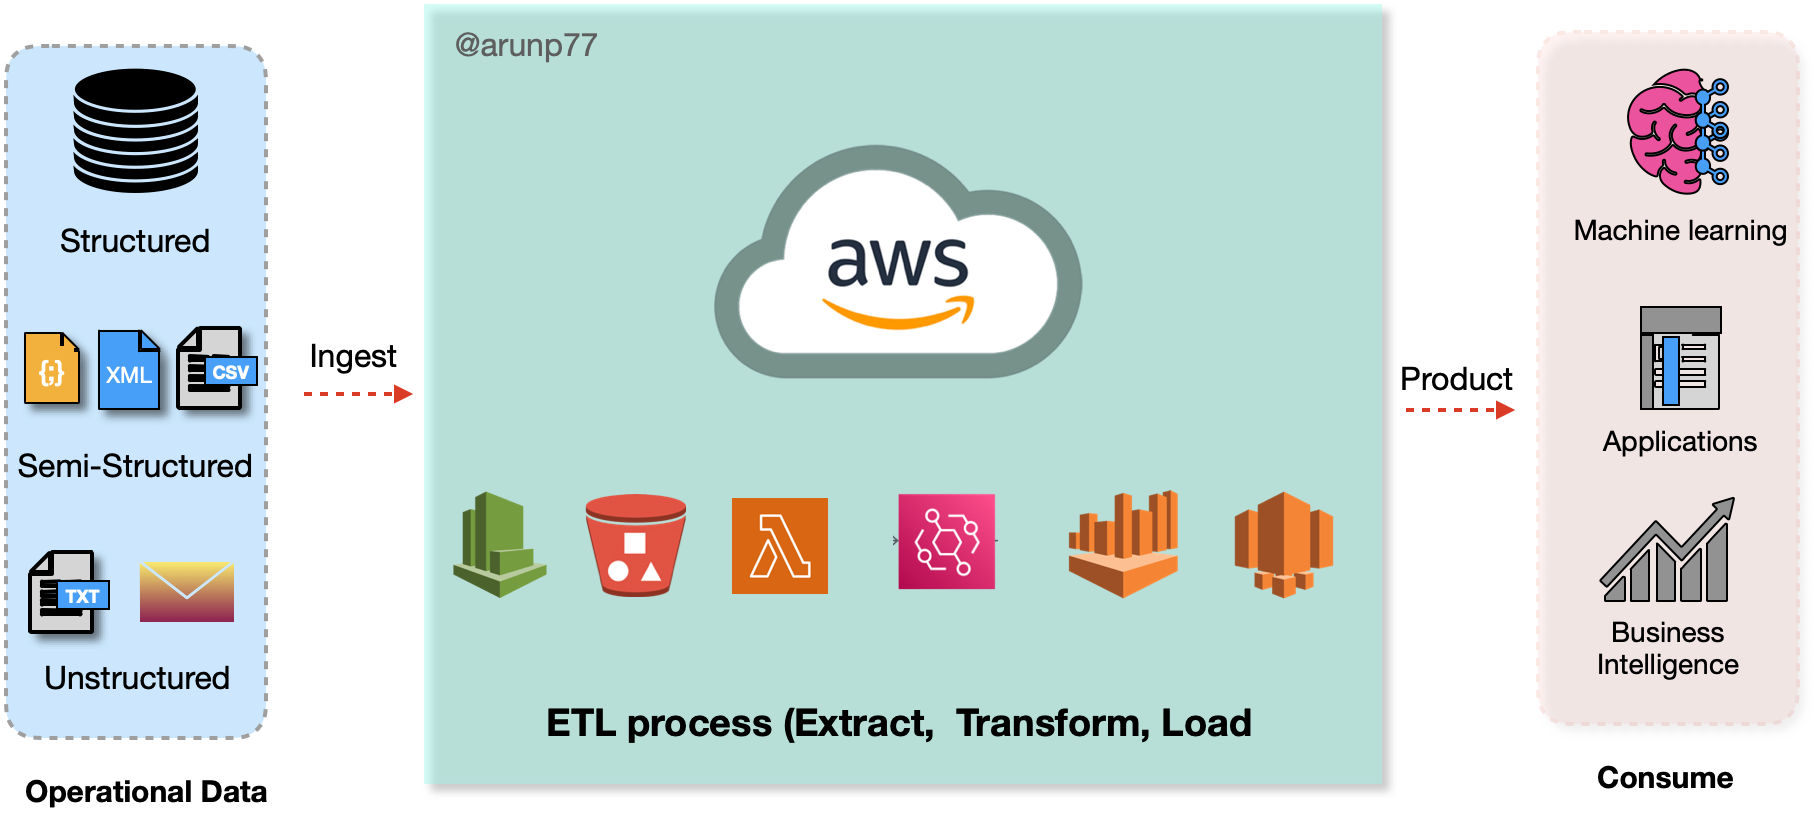

In [ ]:
import json

'''
boto3: This is the AWS SDK for Python, and it provides an interface to various AWS services, including Amazon S3.
'''
import boto3 
import pandas as pd
from datetime import datetime

'''
StringIO: This is a class from the io module that provides an in-memory text stream. It's used here to create an in-memory buffer for CSV data.
'''
from io import StringIO



def album(data):
    album_list = []
    for row in data['items']:
        album_id = row['track']['album']['id']
        album_name = row['track']['album']['name']
        album_release_date = row['track']['album']['release_date']
        album_total_tracks = row['track']['album']['total_tracks']
        album_url = row['track']['album']['external_urls']['spotify']
        album_element = {
            'album_id' : album_id, 
            'album_name' : album_name, 
            'release_date': album_release_date, 
            'total_tracks': album_total_tracks, 
            'url': album_url
        }
        album_list.append(album_element)
    return album_list

def artist(data):
    artist_list = []
    for row in data['items']:
        for key, value in row.items():
            if key =='track':
                for artist in value['artists']:
                    artist_dict = {
                        'artist_id': artist['id'], 
                        'artist_name' : artist['name'], 
                        'external_url' : artist['href']
                    }
                    artist_list.append(artist_dict)
    return artist_list

def songs(data):
    song_list = []
    for row in data['items']:
        song_id = row['track']['id']
        song_name = row['track']['name']
        song_duration = row['track']['duration_ms']
        song_url = row['track']['external_urls']['spotify']
        song_popularity = row['track']['popularity']
        song_added = row['added_at']
        album_id = row['track']['album']['id']
        artist_id = row['track']['album']['artists'][0]['id']
        song_element = {
            'song_id' : song_id,
            'song_name' : song_name, 
            'duration_ms' : song_duration, 
            'url' : song_url,
            'popularity': song_popularity, 
            'song_added' : song_added, 
            'album_id': album_id, 
            'artist_id' : artist_id
        }
        song_list.append(song_element)
    return song_list

'''
Lambda functions typically receive an event as input, which can be used to trigger the function.
'''
def lambda_handler(event, context): 
    '''
    s3 = boto3.client('s3') = Create an S3 Client. The S3 client is used to interact with Amazon S3, 
    allowing you to list objects, upload/download files, and perform various 
    other S3 operations.
    '''
    s3 = boto3.client('s3') 
    Bucket = "spotify-etl-project-arun"  
    Key = "raw_data/to_processed/"
    
    spotify_data = []
    spotify_keys = []
    song_list = []  # Define song_list here
    for file in s3.list_objects(Bucket=Bucket, Prefix=Key)['Contents']:
        file_key = file['Key']
        if file_key.split('.')[-1] == "json":
            response = s3.get_object(Bucket=Bucket, Key=file_key)
            content = response['Body']
            jsonObject = json.loads(content.read())
            spotify_data.append(jsonObject)
            spotify_keys.append(file_key)
            
    for data in spotify_data:
        album_list = album(data)
        artist_list = artist(data)
        songs_list = songs(data)
        song_list.extend(songs_list)
        
        print(album_list)
        '''
        print(album_list)
        Upto this, point we can deploy and test the processes already done for any error.
        Just use print(album_list) at the end of above and then deploy and test
        '''
        
        album_df = pd.DataFrame.from_dict(album_list)
        album_df = album_df.drop_duplicates(subset=['album_id'])

        
        artist_df = pd.DataFrame.from_dict(artist_list)
        artist_df = artist_df.drop_duplicates(subset=['artist_id'])

        
        song_df = pd.DataFrame.from_dict(song_list)
        
        album_df['release_date'] = pd.to_datetime(album_df['release_date'])
        song_df['song_added'] = pd.to_datetime(song_df['song_added'])
        
        songs_key = "transformed_data/songs_data/songs_transformed_" + str(datetime.now()) + ".csv"
        song_buffer = StringIO()
        song_df.to_csv(song_buffer, index=False)
        song_content = song_buffer.getvalue()
        s3.put_object(Bucket=Bucket, Key=songs_key, Body=song_content)
        
        album_key = "transformed_data/album_data/album_transformed_" + str(datetime.now()) + ".csv"
        album_buffer = StringIO()
        album_df.to_csv(album_buffer, index=False)
        album_content = album_buffer.getvalue()
        s3.put_object(Bucket=Bucket, Key=album_key, Body=album_content)
        
        artist_key = "transformed_data/artist_data/artist_transformed_" + str(datetime.now()) + ".csv"
        artist_buffer = StringIO()
        artist_df.to_csv(artist_buffer, index=False)
        artist_content = artist_buffer.getvalue()
        s3.put_object(Bucket=Bucket, Key=artist_key, Body=artist_content)
        
    s3_resource = boto3.resource('s3')
    for key in spotify_keys:
        copy_source = {
            'Bucket': Bucket,
            'Key': key
        }
        destination_key = 'raw_data/processed/' + key.split("to_processed/")[1] 
        s3_resource.meta.client.copy(copy_source, Bucket, destination_key)
        s3_resource.Object(Bucket, key).delete()
        